#### A quick demonstration of bias-hardened lensing/patchy tau/point source reconstruction in fullsky
#### - this code shows how to compute the estiamtors, and output their power spectra

In [1]:
import numpy as np, basic, curvedsky as cs, plottools as pl, pickle, quad_func, tqdm, misctools
from matplotlib.pyplot import *

In [2]:
# define parameters
Tcmb  = 2.726e6    # CMB temperature
lmax  = 2048       # maximum multipole of output normalization
rlmin, rlmax = 100, lmax  # reconstruction multipole range
sig   = 50.
ac2rad = np.pi/180./60.
L = np.linspace(0,lmax,lmax+1)
simn = 10

#### load unlensed and lensed Cls

In [3]:
lcl = basic.aps.read_cambcls('../data/lensedcls.dat',2,lmax,4,bb=True)/Tcmb**2
nl  = np.zeros((4,lmax+1))
nl[0,:] = (sig*ac2rad/Tcmb)**2
nl[1,:] = 2*nl[0,:]
nl[2,:] = 2*nl[0,:]
ocl = lcl + nl

#### Calculate normalizations, N0 and RDN0

In [4]:
# example setup of filename and its ids
ids = [str(i).zfill(5) for i in range(-1,1000)]
ids[0] = 'real'  # change 1st index
falm = { m: ['test_'+m+'_'+x+'.pkl' for x in ids] for m in ['T','E','B'] }

In [5]:
# generate CMB alms 
for i in tqdm.tqdm(range(simn+1)):
    if misctools.check_path(falm['T'][i]): continue
    Talm = cs.utils.gauss1alm(lmax,lcl[0,:])
    Talm += cs.utils.gauss1alm(lmax,nl[0,:])
    pickle.dump((Talm),open(falm['T'][i],"wb"),protocol=pickle.HIGHEST_PROTOCOL)

100%|██████████| 11/11 [00:00<00:00, 5730.64it/s]

In [6]:
qobj = quad_func.quad(root='/global/homes/t/toshiyan/trash/',rlz=range(simn+1),qtype='tau',bhe=['lens'],\
                      lcl=lcl,ocl=ocl,ifl=ocl,falm=falm,rlmin=rlmin,rlmax=rlmax,n0max=np.int(simn/2),rdmax=simn,nside=1024,qlist=['TT'],ids=ids,overwrite=True)

In [7]:
#qobj.qrec_flow(run=['norm','n0','rdn0'])
qobj.qrec_flow(run=['rdn0'])

RDN0: Commpute Spectrum: 100%|██████████████████████████████████████| 11/11 [08:02<00:00, 43.82s/it]


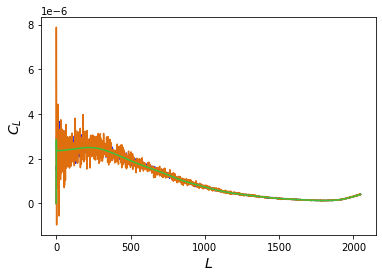

In [8]:
pl.plot_1dstyle()
l, al = np.loadtxt(qobj.f['TT'].al,unpack=True,usecols=(0,1))
l, n0 = np.loadtxt(qobj.f['TT'].n0bs,unpack=True,usecols=(0,1))
#l, rd = np.loadtxt(qobj.f['TT'].rdn0[0],unpack=True,usecols=(0,1))
l, rd = np.loadtxt(qobj.f['TT'].rdn0[1],unpack=True,usecols=(0,1))
plot(l,n0)
plot(l,rd)
plot(l,al)